## Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Задание1

#### Модифицировать реализацию линейной регрессии из предыдущего урока, добавив l2 регулярязационную поправку к штрафной функции: +𝑐∗∑(𝑤_j)^2 и соответствующую к выражению для производной. Опробовать реализацию на примере с полиномиальными фичами 6го порядка из данного урока. При каком значении С в воспроизводимой функции не будет воспроизводить несуществующий минимум в окрестностях x=7,5?

In [2]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features, ))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

# возьмем нулевые начальные веса
w = np.zeros(n_features)

In [3]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred, c=0.1):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y) + c * w.dot(w.T)
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y))

normal_eq_w = normal_equation(X, Y)
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(mserror(X, normal_eq_w, Y), 4)}')

В случае использования нормального уравнения функционал ошибки составляет 0.3965


In [4]:
# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
alpha = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0
def grad(_x, _w, _y, c):
    return np.dot(_x.T, (np.dot(_x, _w) - _y)) / _y.shape[0] + 2 * c * w

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w -  alpha * 2 * grad(X, w, Y, 0.1)
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    cur_error=mserror(X, new_w, Y, 0.1)
    print(cur_error)
    errors.append(cur_error)
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

10.526395151973162
4.940490911464297
2.4455915499547345
1.3272258906779946
0.8234568216599157
0.5950185982730518
0.4904816266675419
0.44204365433727083
0.41921952465460977
0.4082250304727571
0.4027793021483382
0.3999901223488272
0.3985065296370891
0.39768538491214345
0.3972129184404286
0.3969313438819202
0.3967584558280173
0.39664973483014676
0.39658010215509376
0.3965348951635925
0.3965052559946548
0.39648568676471224
0.3964727017421791
0.3964640551588156
0.39645828297094543
0.3964544226153255
0.39645183739811357
0.39645010436265415
0.3964489416788366
0.3964481611416613
0.3964476368675339
0.39644728455708667
0.39644704770676575
0.3964468884164176
0.39644678124917043
0.396446709124321
0.3964466605671806
0.3964466278660278
0.39644660583614644
0.39644659099052926
0.39644658098316393
0.3964465742351647
0.3964465696835777
0.396446566612563
0.3964465645398892
0.3964465631405961


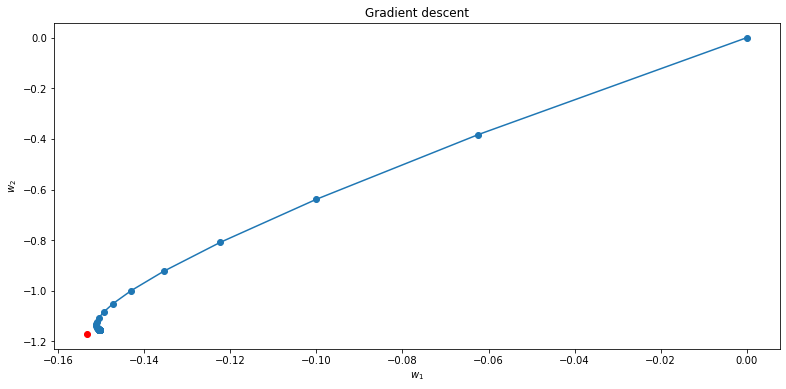

In [5]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

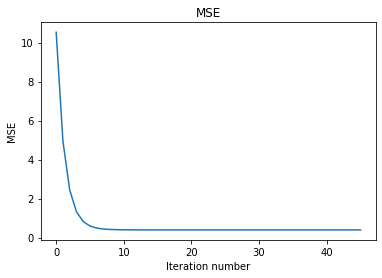

In [6]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'log(MSE)')

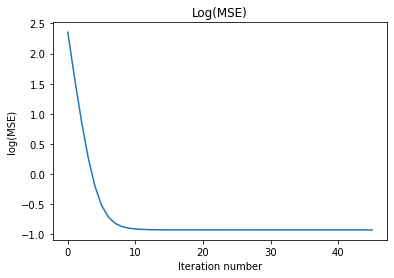

In [7]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), np.log(np.array(errors)))
plt.title('Log(MSE)')
plt.xlabel('Iteration number')
plt.ylabel('log(MSE)')

### Задание2

#### Модифицировать пример со стохастическим градиентом из этого урока, реализовав в нём рассчёт градиента по десяти случайно выбираемым объектам (mini-batch градиент).

In [8]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [9]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [10]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [11]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0], size = 10)
    #print(train_ind)
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    error=mserror(data, new_w, target)
    errors.append(error)
    if iter_num %1000==0:
        print(error)
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

8188.141355904686
5521.484450864691
3728.2437215955943
2500.589781988877
1691.0981805081678
1152.8828921189306
787.1365432447
543.8486159200147
378.9864631511353
268.3730172952478
193.75146798313526
143.6075133652156
109.91286928629808
87.2932921898281
71.55225583295787
60.7986522237015
53.743351771934634
48.93940818352659
45.58566543225795
43.398114168124756
41.79801740610138
40.7481198684044
40.02991484250265
39.55557541316949
39.268233143818094
39.05361280518062
38.89302235785272
38.781672055551205
38.71317668950622
38.66482497960276
38.625382696606685
38.608175589673024
38.590133834247546
38.58453613926249
38.57700096578504
38.577170570094914
38.57274787710808
38.570938241734886
38.56974929752296
38.5700674903529
38.56933559918379
38.56881855996878
38.5686495501416
38.56879189190044
38.56930083358968
38.56973627132135
38.57137061323526
38.570604827078135
38.57076927663319
38.56934772643747
38.568471430689925
38.568906664317865
38.56897195419231
38.56915144174528
38.568712357841704
